## Combined CDF plots for HM-Hybrid and DM-Hybrid

## Common part and imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from matplotlib import rc

def custom_grouping(index):
    return index // 1000

# names_bw=['time', 'bw', 'op1', 'size', 'op2' ]
# names_latency=['time', 'latency', 'op2', 'write_size', 'op3']
names_latency=['submission_time', 'duration', 'op2', 'write_size', 'op3']
columns = ['submission_time', 'duration', 'write_size']

/var/folders/2k/prv9ywh52sn57l626bl42pz40000gp/T/ipykernel_75489/3763110992.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([sci_superscript(tick) for tick in ax.get_xticks()], fontsize=12, fontweight='semibold')
/var/folders/2k/prv9ywh52sn57l626bl42pz40000gp/T/ipykernel_75489/3763110992.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([sci_superscript(tick) for tick in ax.get_xticks()], fontsize=12, fontweight='semibold')
/var/folders/2k/prv9ywh52sn57l626bl42pz40000gp/T/ipykernel_75489/3763110992.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([sci_superscript(tick) for tick in ax.get_xticks()], fontsize=12, fontweight='semibold')
/var/folders/2k/prv9ywh52sn57l626b

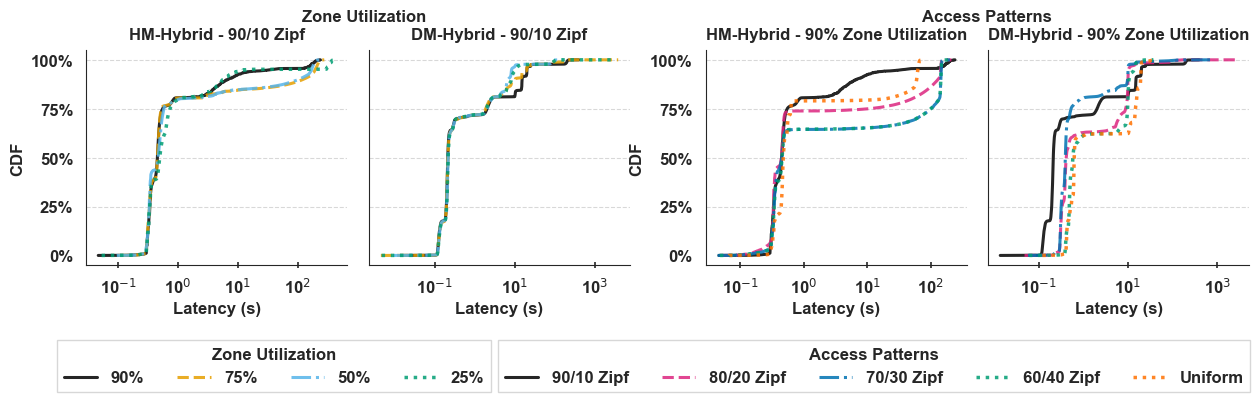

In [ ]:
# Combined CDF plots for HM-Hybrid and DM-Hybrid
# Four plots combined into one figure with shared legend

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

# Create figure with 4 subplots in a row - increase width to accommodate extra spacing
fig_width_pt = 241.02039 * 4.5  # Increased width to accommodate extra spacing
inches_per_pt = 1.0/72.27
golden_mean = (math.sqrt(5)-1.0)/2.0
fig_width = fig_width_pt * inches_per_pt
fig_height = fig_width * golden_mean * 0.4  # Keep same height proportion
fig_size = [fig_width, fig_height]

# Create figure and subplots with proper y-axis sharing
fig, axes = plt.subplots(1, 4, figsize=fig_size)
ax1, ax2, ax3, ax4 = axes

# Share y-axis between ax1 and ax2 (zone utilization plots)
ax2.sharey(ax1)
# Share y-axis between ax3 and ax4 (access pattern plots)
ax4.sharey(ax3)

# Create custom spacing - add extra space between plot 2 and 3
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 5, figure=fig, width_ratios=[1, 1, 0.125, 1, 1], 
                      wspace=0.1)  # Increased wspace for more spacing

# Recreate axes with custom gridspec
for ax in axes:
    ax.remove()

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4], sharey=ax3)

# Adjust spacing to make room for category headers
plt.subplots_adjust(top=0.78, bottom=0.2)

# Set up clean styling
sns.set_theme()
sns.set_style("white")
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['path.simplify'] = True
plt.rcParams['path.simplify_threshold'] = 0.1

# Define different color palettes for different plot types
zone_util_colors = {
    '90%': '#000000',   # Black
    '75%': '#E69F00',   # Orange  
    '50%': '#56B4E9',   # Blue
    '25%': "#009E73",   # Green
}

zipf_colors = {
    '9010': '#000000',   # Purple
    '8020': '#DC267F',   # Orange
    '7030': '#0072B2',   # Light blue
    '6040': '#009E73',   # Blue
    'uniform': '#FF7100' # Light green
}

# Common percentile reference lines function
def add_percentile_lines(ax):
    percentiles = [0.25, 0.5, 0.75, 1.0]
    for p in percentiles:
        ax.axhline(y=p, color='gray', linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)

# Common axis formatting
def format_axis(ax, title, xlabel_visible=True, ylabel_visible=True):
    ax.set_xscale('log', base=10)
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.xaxis.set_major_formatter(ticker.LogFormatterMathtext(base=10))
    ax.grid(False)
    add_percentile_lines(ax)
    
    ytick_positions = [0, 0.25, 0.5, 0.75, 1]
    ytick_labels = ['0%', '25%', '50%', '75%', '100%']
    ax.set_yticks(ytick_positions)
    if ylabel_visible:
        ax.set_yticklabels(ytick_labels, fontsize=12, fontweight='semibold')
    else:
        ax.tick_params(axis='y', labelleft=False)
    ax.tick_params(axis='x', labelsize=12, which='both')
    
    if xlabel_visible:
        ax.set_xlabel('Latency (s)', fontsize=12, fontweight='semibold')
        # Format x-tick labels with exponents in superscript
        def sci_superscript(val):
            s = f"{val:.0e}"
            if "e" in s:
                _, exp = s.split("e")
                exp = int(exp)
                return f"10$^{{{exp}}}$"
            else:
                return s
        ax.set_xticklabels([sci_superscript(tick) for tick in ax.get_xticks()], fontsize=12, fontweight='semibold')
        ax.tick_params(axis='x', which='both', direction='inout', length=8, width=1.2, bottom=True, top=False)
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_marker('|')
            tick.tick1line.set_markersize(4)
            tick.tick1line.set_markeredgewidth(1.2)
    ax.set_title(title, fontsize=12, fontweight='semibold', pad=8)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
######################################################
# Plot 1: HM-Hybrid Performance - 90:10 Zipf + varying Zone Utilization
ax = ax1

# 90% zone utilization
df = pd.read_csv('fast2026/HM-Hybrid/1M/90-10-LBA/90Util/round1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-', label="90%", 
        color=zone_util_colors['90%'], linewidth=2.2, alpha=0.85)

# 75% zone utilization
df = pd.read_csv('fast2026/HM-Hybrid/1M/90-10-LBA/75Util/147Zones.WakeOne/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='--', label="75%", 
        color=zone_util_colors['75%'], linewidth=2.2, alpha=0.85)

# 50% zone utilization
df = pd.read_csv('fast2026/HM-Hybrid/1M/90-10-LBA/50Util/147Zones.WakesOne/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-.', label="50%", 
        color=zone_util_colors['50%'], linewidth=2.2, alpha=0.85)

# 25% zone utilization
df = pd.read_csv('fast2026/HM-Hybrid/1M/90-10-LBA/25Util/147Zones.WakeAfterThree/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="25%", 
        color=zone_util_colors['25%'], linewidth=2.5, alpha=0.85)

format_axis(ax, 'HM-Hybrid - 90/10 Zipf', ylabel_visible=True)
ax.set_ylabel('CDF', fontsize=12, fontweight='semibold')

########################################################
# Plot 2: DMHybrid Performance - 90/10 zipf +  Zone Varying Utilization  
ax = ax2
ax.set_xscale('log', base=10)
# 90% zone utilization
df = pd.read_csv('fast2026/STL/1M/90-10-LBA/90Util/run1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-', label="90% zone util.", 
        color=zone_util_colors['90%'], linewidth=2.2, alpha=0.85)

# 75% zone utilization
df = pd.read_csv('fast2026/STL/1M/90-10-LBA/75Util/run1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='--', label="75% zone util.", 
        color=zone_util_colors['75%'], linewidth=2.2, alpha=0.85)

# 50% zone utilization  
df = pd.read_csv('fast2026/STL/1M/90-10-LBA/50Util/run1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-.', label="50% zone util.", 
        color=zone_util_colors['50%'], linewidth=2.2, alpha=0.85)

# 25% zone utilization
df = pd.read_csv('fast2026/STL/1M/90-10-LBA/25Util/run1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="25% zone util.", 
        color=zone_util_colors['25%'], linewidth=2.5, alpha=0.85)

format_axis(ax, 'DM-Hybrid - 90/10 Zipf', ylabel_visible=False)


########################################################
# Plot 3: HMHybrid Performance - 90% zone util + varying Access Patterns
ax = ax3

# 90/10 Zipf
df = pd.read_csv('fast2026/HM-Hybrid/90-10-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-', label="90/10 Zipf", 
        color=zipf_colors['9010'], linewidth=2.2, alpha=0.85)

# 80/20 Zipf
df = pd.read_csv('fast2026/HM_Hybrid_new/HM-Hybrid/80-20-LBA/1M/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='--', label="80/20 Zipf", 
        color=zipf_colors['8020'], linewidth=2.2, alpha=0.85)

# 70/30 Zipf
df = pd.read_csv('fast2026/HM_Hybrid_new/HM-Hybrid/70-30-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-.', label="70/30 Zipf", 
        color=zipf_colors['7030'], linewidth=2.2, alpha=0.85)

# 60/40 Zipf (using 70/30 data as placeholder)
df = pd.read_csv('fast2026/HM_Hybrid_new/HM-Hybrid/60-40-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="60/40 Zipf", 
        color=zipf_colors['6040'], linewidth=2.5, alpha=0.85)

# Uniform
df = pd.read_csv('fast2026/HM_Hybrid_new/HM-Hybrid/uniform/90Util/round2/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="Uniform", 
        color=zipf_colors['uniform'], linewidth=2.5, alpha=0.85)

format_axis(ax, 'HM-Hybrid - 90% Zone Utilization', ylabel_visible=True)
ax.set_ylabel('CDF', fontsize=12, fontweight='semibold')
########################################################
# Plot 4: DMHybrid Performance - Access Patterns
ax = ax4

# 90/10 Zipf
df = pd.read_csv('fast2026/STL/1M/90-10-LBA/90Util/run1/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-', label="90/10 Zipf", 
        color=zipf_colors['9010'], linewidth=2.2, alpha=0.85)

# 80/20 Zipf
df = pd.read_csv('fast2026/STL/1M/80-20-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='--', label="80/20 Zipf", 
        color=zipf_colors['8020'], linewidth=2.2, alpha=0.85)

# 70/30 Zipf
df = pd.read_csv('fast2026/STL/1M/70-30-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle='-.', label="70/30 Zipf", 
        color=zipf_colors['7030'], linewidth=2.2, alpha=0.85)

# 60/40 Zipf
df = pd.read_csv('fast2026/STL/1M/60-40-LBA/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="60/40 Zipf", 
        color=zipf_colors['6040'], linewidth=2.5, alpha=0.85)

# Uniform
df = pd.read_csv('fast2026/STL/1M/uniform/new/uniform/90Util/lat_log_avg_lat.1.log', 
                 names=names_latency, usecols=columns)
df['duration'] = df['duration']/1e9
data_sorted = np.sort(df['duration'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
ax.plot(data_sorted, cdf, linestyle=':', label="Uniform", 
        color=zipf_colors['uniform'], linewidth=2.5, alpha=0.85)

format_axis(ax, 'DM-Hybrid - 90% Zone Utilization', ylabel_visible=False)

# Add category headers above plot pairs
fig.text(0.31, 0.85, 'Zone Utilization', fontsize=12, fontweight='bold', 
         ha='center', va='bottom')
fig.text(0.725, 0.85, 'Access Patterns', fontsize=12, fontweight='bold', 
         ha='center', va='bottom')

# Create shared legends - one for each type of comparison
# Zone utilization legend (for plots a and b)
zone_util_handles = []
zone_util_labels = []
for line in ax1.get_lines():
    if not line.get_label().startswith('_'):  # Filter out _child labels
        zone_util_handles.append(line)
        zone_util_labels.append(line.get_label())

# Access pattern legend (for plots c and d) 
access_handles = []
access_labels = []
for line in ax3.get_lines():
    if not line.get_label().startswith('_'):  # Filter out _child labels
        access_handles.append(line)
        access_labels.append(line.get_label())

# Keep same legend placement - side by side layout
legend1 = fig.legend(zone_util_handles, zone_util_labels, 
                    loc='upper center', bbox_to_anchor=(0.25, 0.02), 
                    ncol=4, prop={'size': 12, 'weight': 'semibold'},
                    frameon=True, fancybox=False, shadow=False, 
                    framealpha=0.9, edgecolor='lightgray',
                    title='Zone Utilization', title_fontsize=12)
legend1.set_title('Zone Utilization', prop={'size': 12, 'weight': 'semibold'})

legend2 = fig.legend(access_handles, access_labels,
                    loc='upper center', bbox_to_anchor=(0.65, 0.02),
                    ncol=5, prop={'size': 12, 'weight': 'semibold'},
                    frameon=True, fancybox=False, shadow=False,
                    framealpha=0.9, edgecolor='lightgray',
                    title='Access Patterns', title_fontsize=12)
legend2.set_title('Access Patterns', prop={'size': 12, 'weight': 'semibold'})

# Save the combined figure
plt.savefig("figures/Combined_CDF_1MB_Analysis.pdf", 
            bbox_inches='tight', dpi=600, facecolor='white')
plt.show()